まずはzipファイルを展開してdatasets/ディレクトリに置く・・・

In [8]:
#import zipfile, os

#with zipfile.ZipFile('/home/my_name/ダウンロード/archive.zip') as data:
    #data.extractall('/home/my_name/ML/datasets')

csvファイルデータフレームオブジェクトにする

In [13]:
import pandas as pd

original_data = pd.read_csv('/home/aizawa/ML/datasets/winequality-red.csv')

original_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


データをいじらず可視化して観察してみる

In [16]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
original_data.isnull().any()

#NAN無しすご

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [18]:
original_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


qualityは0~10が範囲だから、満点は無いらしい
fixed acidity・・・固定酸度
volatile acidity・・・揮発性酸度
cirtic acid・・・クエン酸
residual sugar・・・残留糖分
chlorides・・・塩化物
free sulfur dioxide・・・遊離二酸化硫黄
total sulfur dioxide・・・全二酸化硫黄
density・・・密度
pH・・・水素イオン指数
sulphates・・・硫酸塩
alcoholsu・・・アルコール

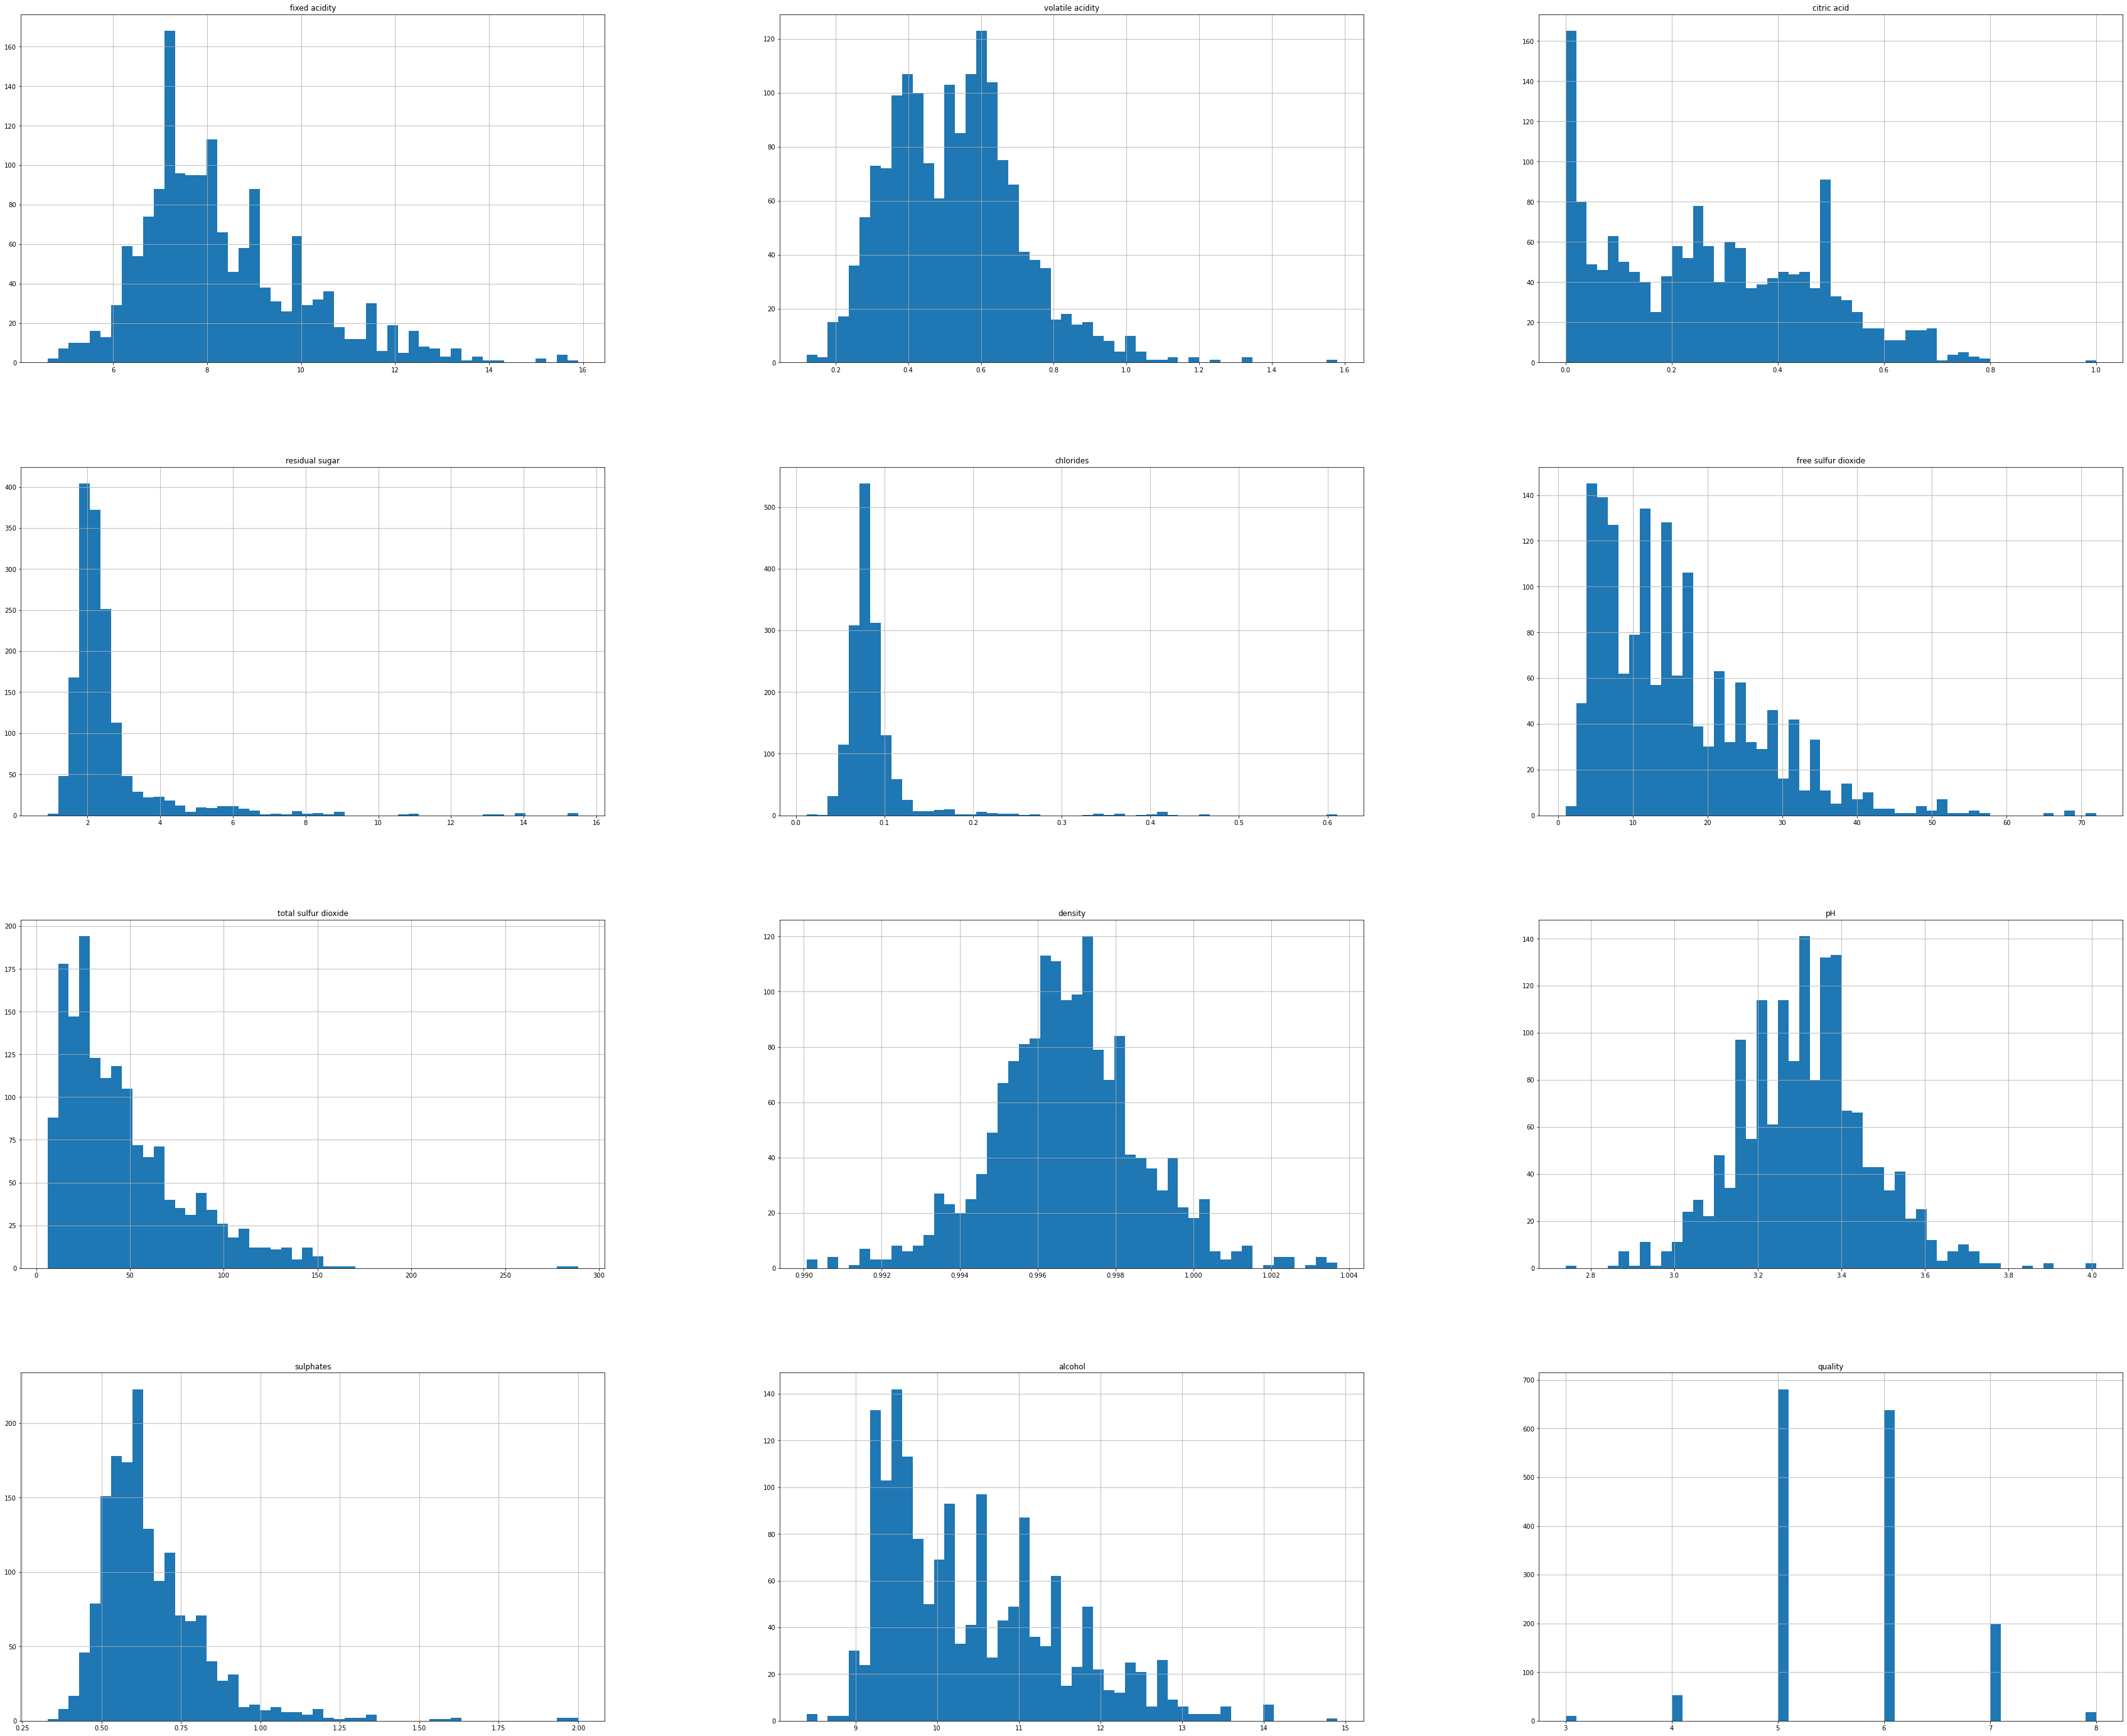

In [27]:
original_data.hist(bins=50, figsize=(60, 50))
plt.show()

データをテストセットと訓練セットに分割する
無作為分割でいいかなぁ

In [31]:
rng = np.random.default_rng()

def split_train_test(data, test_ratio):
    shuffled_indices = rng.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]
    

In [32]:
train_set, test_set = split_train_test(original_data, 0.2)

In [33]:
len(test_set) / (len(train_set) + len(test_set))

0.19949968730456535

In [34]:
train_set

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1012,7.7,1.005,0.15,2.1,0.102,11.0,32.0,0.99604,3.23,0.48,10.0,5
862,7.5,0.420,0.32,2.7,0.067,7.0,25.0,0.99628,3.24,0.44,10.4,5
532,11.9,0.380,0.49,2.7,0.098,12.0,42.0,1.00040,3.16,0.61,10.3,5
850,9.3,0.430,0.44,1.9,0.085,9.0,22.0,0.99708,3.28,0.55,9.5,5
266,8.1,0.870,0.00,3.3,0.096,26.0,61.0,1.00025,3.60,0.72,9.8,4
...,...,...,...,...,...,...,...,...,...,...,...,...
1383,8.0,0.600,0.22,2.1,0.080,25.0,105.0,0.99613,3.30,0.49,9.9,5
1431,7.6,0.430,0.31,2.1,0.069,13.0,74.0,0.99580,3.26,0.54,9.9,6
1374,6.8,0.815,0.00,1.2,0.267,16.0,29.0,0.99471,3.32,0.51,9.8,3
159,6.8,0.600,0.18,1.9,0.079,18.0,86.0,0.99680,3.59,0.57,9.3,6


訓練セットを観察していく

In [36]:
corr_matrix = train_set.corr()
corr_matrix["quality"].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.468564
sulphates               0.258812
citric acid             0.240351
fixed acidity           0.138072
residual sugar          0.020326
free sulfur dioxide    -0.066540
pH                     -0.073340
chlorides              -0.130308
density                -0.156157
total sulfur dioxide   -0.192639
volatile acidity       -0.406173
Name: quality, dtype: float64

alcoholが高いほどqualityが高いという愚直なモデルを作ってみたい

In [37]:
train_set.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000
mean,8.344063,0.523391,0.272656,2.526328,0.086126,15.821484,45.684375,0.996762,3.310969,0.659883,10.435052,5.656250
std,1.771138,0.177243,0.195471,1.368003,0.042669,10.522397,31.957360,0.001900,0.153102,0.165579,1.065035,0.810771
min,4.600000,0.120000,0.000000,0.900000,0.034000,1.000000,6.000000,0.990070,2.860000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.097500,1.900000,0.070000,7.000000,22.000000,0.995578,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.510000,0.260000,2.200000,0.079000,13.500000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.300000,0.635000,0.430000,2.600000,0.090000,21.000000,61.000000,0.997877,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,0.790000,15.500000,0.611000,72.000000,278.000000,1.003690,4.010000,1.980000,14.900000,8.000000


正規化して、11等分するか

In [40]:
alcohol = train_set['alcohol']

alcohol_normalized = (alcohol - alcohol.min()) / (alcohol.max() - alcohol.min())

In [42]:
alcohol_normalized.describe()

count    1280.000000
mean        0.313085
std         0.163852
min         0.000000
25%         0.169231
50%         0.276923
75%         0.415385
max         1.000000
Name: alcohol, dtype: float64

In [45]:
division = [x / 10 for x in range(11)]
division

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

In [47]:
cutted_alcohol = pd.cut(alcohol_normalized,
                        bins=division,
                        labels=[x for x in range(10)])

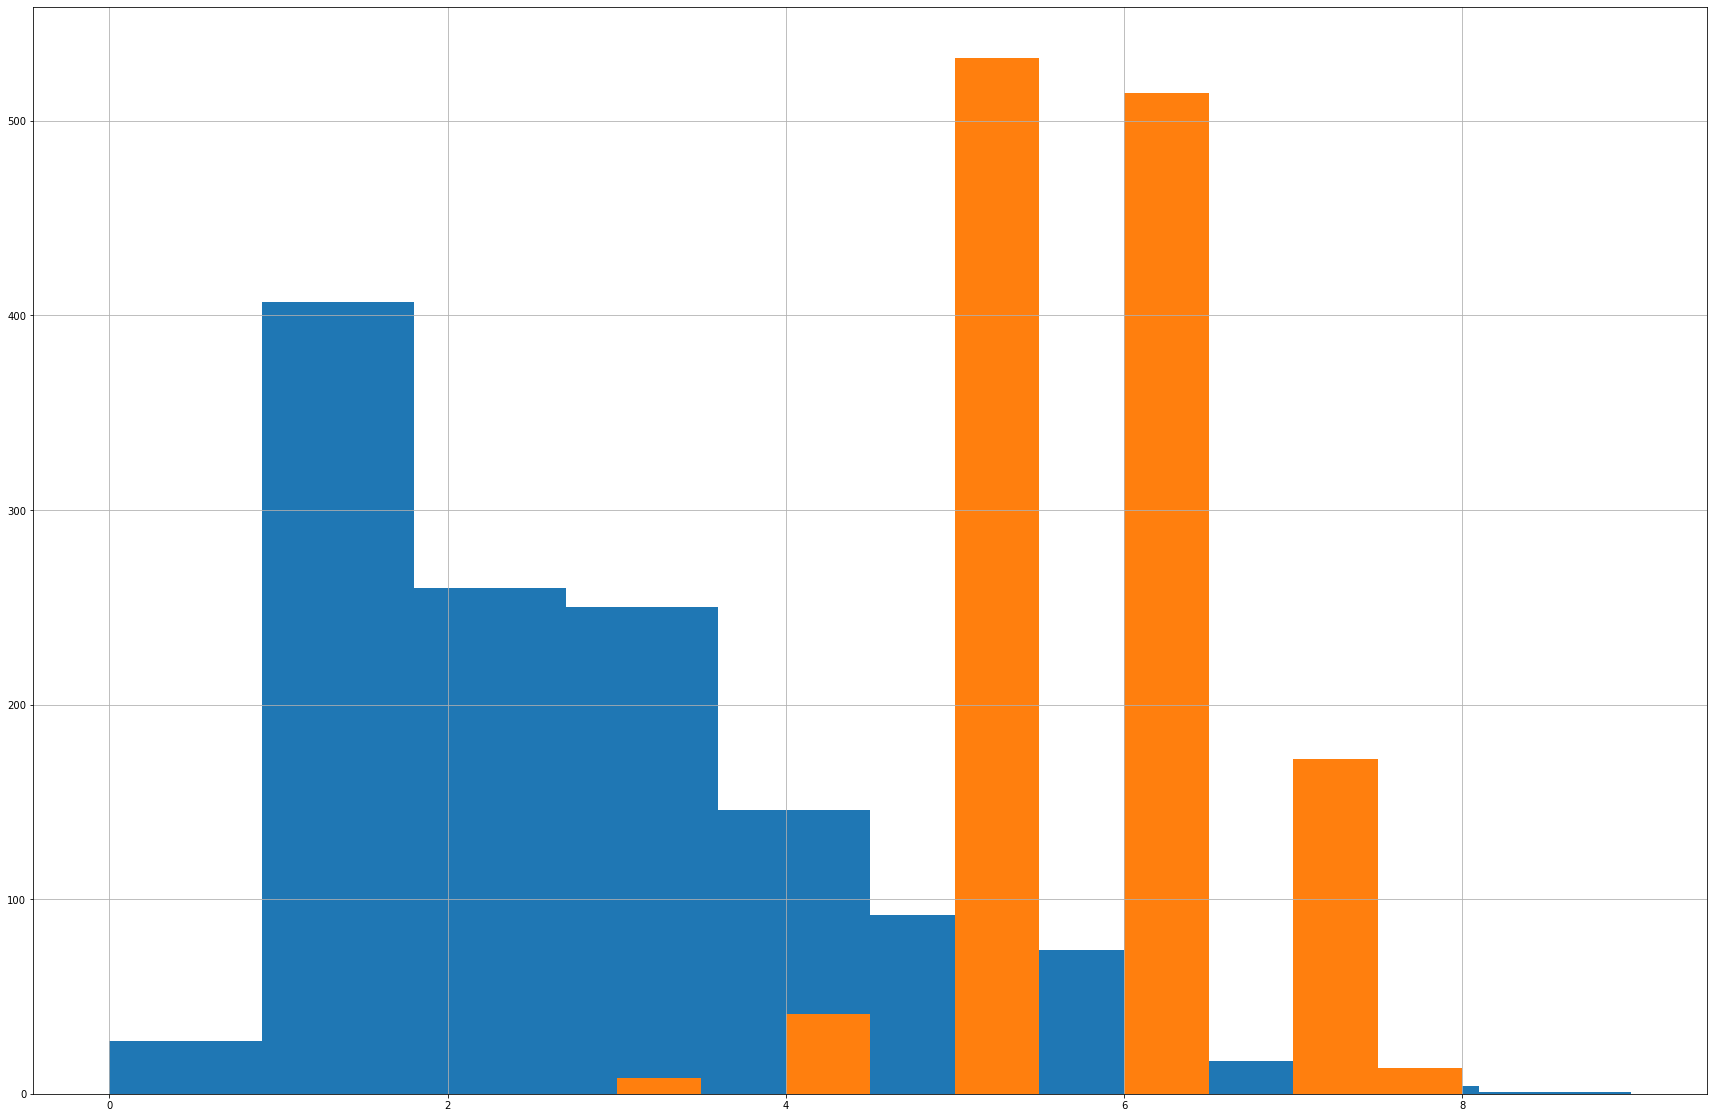

In [57]:
cutted_alcohol.hist()
train_set["quality"].hist(figsize=(30, 20))
plt.show()

まあ無理だよね。気が向いたら誤差分析しよう
関数だけ作っておいて次行く

In [58]:
def predict_from_high_corr(data, series, division_num):
    subject = data[series]
    subject_normalized = (subject - subject.min()) / (subject.max() - subject.min())
    cutted_series = pd.cut(subject_normalized,
                           bins=[x / (division_num - 1) for x in range(division_num)],
                           labels=[x for x in range(division_num - 1)])
    return cutted_series

<AxesSubplot:>

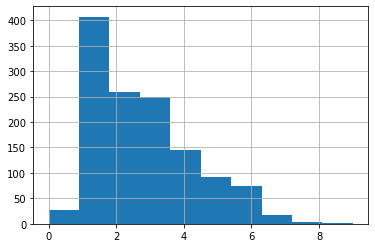

In [59]:
test_al = "alcohol"
predict_from_high_corr(train_set, test_al, 11).hist()

In [62]:
train_set.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000
mean,8.344063,0.523391,0.272656,2.526328,0.086126,15.821484,45.684375,0.996762,3.310969,0.659883,10.435052,5.656250
std,1.771138,0.177243,0.195471,1.368003,0.042669,10.522397,31.957360,0.001900,0.153102,0.165579,1.065035,0.810771
min,4.600000,0.120000,0.000000,0.900000,0.034000,1.000000,6.000000,0.990070,2.860000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.097500,1.900000,0.070000,7.000000,22.000000,0.995578,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.510000,0.260000,2.200000,0.079000,13.500000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.300000,0.635000,0.430000,2.600000,0.090000,21.000000,61.000000,0.997877,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,0.790000,15.500000,0.611000,72.000000,278.000000,1.003690,4.010000,1.980000,14.900000,8.000000


In [66]:
corr_matrix["quality"].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.468564
sulphates               0.258812
citric acid             0.240351
fixed acidity           0.138072
residual sugar          0.020326
free sulfur dioxide    -0.066540
pH                     -0.073340
chlorides              -0.130308
density                -0.156157
total sulfur dioxide   -0.192639
volatile acidity       -0.406173
Name: quality, dtype: float64

次はscikit-learnの線形回帰モデルに突っ込もう
alcoholを説明変数とした単回帰

In [72]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

ex_val = train_set.loc[:, ['alcohol']]
obj_val = train_set.loc[:, ['quality']]

In [73]:
lin_reg.fit(ex_val, obj_val)
lin_reg.predict(lin_reg.predict(ex_val))

/home/aizawa/anaconda3/envs/slKTF/lib/python3.9/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[3.8962972 ],
       [3.94719117],
       [3.93446768],
       ...,
       [3.87085021],
       [3.80723275],
       [3.8962972 ]])

ValueError: x must have 2 or fewer dimensions

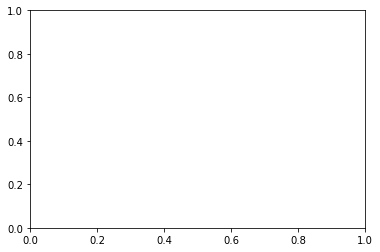

In [82]:
lin_simple_predicted = lin_reg.predict(ex_val)
plt.hist([lin_simple_predicted, obj_val], figsize=(30, 30))

In [76]:
from sklearn.metrics import mean_squared_error

lin_mse = mean_squared_error(obj_val, ex_val)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

4.8804325144169125